#202055156_함주원_중간대체과제_단백질및지방섭취량과_악력및운동횟수와_체질량지수의_상관관계

In [32]:
import numpy as np
import numpy.random as random
import scipy as sp
import scipy.stats as stats
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
%precision 3


'%.3f'

In [33]:
data = pd.read_csv('hn18_all.csv')
data

C:\Users\user\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (146,436,555,570,572,587) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,mod_d,ID,ID_fam,year,region,town_t,apt_t,psu,sex,age,...,HEI_TVEG,HEI_VEG,HEI_PROTF,HEI_DAIRY,HEI_SFA,HEI_NA,HEI_SWEET,HEI_CHO,HEI_FAT,HEI_EN
0,2020.09.01.,A901020501,A9010205,2018,1,1,2,A901,1,80,...,1.367163,0.775022,5.800000,0.00,5.273475,10.000000,10.00000,5.000000,5.000000,0.000000
1,2020.09.01.,A901021301,A9010213,2018,1,1,2,A901,1,78,...,4.881043,1.641812,10.000000,10.00,10.000000,3.418798,10.00000,4.345249,2.956568,5.000000
2,2020.09.01.,A901021302,A9010213,2018,1,1,2,A901,2,75,...,3.367648,4.943629,4.849725,10.00,0.000000,9.806158,10.00000,5.000000,5.000000,5.000000
3,2020.09.01.,A901022601,A9010226,2018,1,1,2,A901,2,43,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020.09.01.,A901023303,A9010233,2018,1,1,2,A901,2,80,...,4.619405,0.437024,1.951565,0.00,10.000000,8.029505,10.00000,0.000000,0.000000,1.244134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7987,2020.09.01.,R904028902,R9040289,2018,8,1,2,R904,2,73,...,5.000000,3.460232,2.940008,7.28,6.332807,10.000000,7.98486,2.797653,5.000000,0.000000
7988,2020.09.01.,R904029201,R9040292,2018,8,1,2,R904,1,43,...,5.000000,5.000000,10.000000,0.00,0.000000,2.017411,10.00000,0.000000,0.000000,0.000000
7989,2020.09.01.,R904029202,R9040292,2018,8,1,2,R904,2,39,...,5.000000,5.000000,10.000000,0.00,0.000000,5.828002,10.00000,0.000000,0.000000,1.288707
7990,2020.09.01.,R904029203,R9040292,2018,8,1,2,R904,1,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
d1 = data[(data.age >= 20) & (data.age < 60)]
d1

,mod_d,ID,ID_fam,year,region,town_t,apt_t,psu,sex,age,...,HEI_TVEG,HEI_VEG,HEI_PROTF,HEI_DAIRY,HEI_SFA,HEI_NA,HEI_SWEET,HEI_CHO,HEI_FAT,HEI_EN
3,2020.09.01.,A901022601,A9010226,2018,1,1,2,A901,2,43,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2020.09.01.,A901023501,A9010235,2018,1,1,2,A901,1,44,...,2.368973,1.640357,5.379167,0.0,10.0,10.000000,10.0,0.0,0.000000,0.000000
7,2020.09.01.,A901023502,A9010235,2018,1,1,2,A901,2,42,...,1.070015,0.762023,3.354121,0.0,10.0,10.000000,10.0,0.0,0.000000,0.000000
10,2020.09.01.,A901023901,A9010239,2018,1,1,2,A901,1,36,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,2020.09.01.,A901023902,A9010239,2018,1,1,2,A901,2,30,...,0.704281,1.126849,2.237232,10.0,10.0,10.000000,10.0,0.0,1.055157,5.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7978,2020.09.01.,R904028101,R9040281,2018,8,1,2,R904,1,42,...,5.000000,5.000000,10.000000,0.0,10.0,6.967087,10.0,5.0,5.000000,5.000000
7981,2020.09.01.,R904028501,R9040285,2018,8,1,2,R904,1,41,...,5.000000,5.000000,10.000000,10.0,10.0,0.000000,10.0,5.0,5.000000,0.000000
7982,2020.09.01.,R904028502,R9040285,2018,8,1,2,R904,2,35,...,4.570954,3.868013,10.000000,10.0,10.0,2.395604,10.0,5.0,5.000000,5.000000
7988,2020.09.01.,R904029201,R9040292,2018,8,1,2,R904,1,43,...,5.000000,5.000000,10.000000,0.0,0.0,2.017411,10.0,0.0,0.000000,0.000000


In [37]:
d1.loc[(d1.BE5_1 > 7), 'BE5_1']=0
d1['Power'] = ['strong' if b>50 else 'normal' if b>30 else 'weak' for b in d1['GS_mea_r_2']]
d1.Power

C:\Users\user\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
<ipython-input-37-78b1faf901f2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d1['Power'] = ['strong' if b>50 else 'normal' if b>30 else 'weak' for b in d1['GS_mea_r_2']]


3         weak
6       normal
7         weak
10      normal
11        weak
         ...  
7978    strong
7981    strong
7982      weak
7988    normal
7989      weak
Name: Power, Length: 4136, dtype: object

In [38]:
d1['Obesity'] = ['비만' if b>25 else '과체중' if b>23 else '정상' if b>18.5 else '저체중' for b in d1['HE_BMI']]
d1.Obesity

<ipython-input-38-972f6e7082c1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d1['Obesity'] = ['비만' if b>25 else '과체중' if b>23 else '정상' if b>18.5 else '저체중' for b in d1['HE_BMI']]


3       과체중
6        비만
7        정상
10      과체중
11      과체중
       ... 
7978     비만
7981     비만
7982     정상
7988     비만
7989     정상
Name: Obesity, Length: 4136, dtype: object

In [39]:
d2=d1[['age','BE5_1','N_PROT','N_FAT','N_WAT_C','GS_mea_r_2','Power','HE_wt','HE_BMI','Obesity']]
d2
#나이_운동횟수_단백질섭취량_지방섭취량_물섭취량_악력_악력분류_체중_체질량지수_체질량지수분류

,age,BE5_1,N_PROT,N_FAT,N_WAT_C,GS_mea_r_2,Power,HE_wt,HE_BMI,Obesity
3,43,1.0,NaN,NaN,NaN,24.5,weak,53.5,23.463883,과체중
6,44,1.0,48.876453,4.630859,2.0,32.5,normal,85.6,26.419753,비만
7,42,1.0,16.082511,4.773271,2.0,25.2,weak,54.2,19.021922,정상
10,36,1.0,NaN,NaN,NaN,32.4,normal,69.0,23.161544,과체중
11,30,1.0,53.855608,19.558535,4.0,23.8,weak,54.7,23.094581,과체중
...,...,...,...,...,...,...,...,...,...,...
7978,42,1.0,90.403007,44.978269,5.0,52.6,strong,78.1,25.356937,비만
7981,41,1.0,153.045439,61.656276,5.0,58.6,strong,91.0,28.496550,비만
7982,35,1.0,92.198711,52.089722,2.0,28.4,weak,55.6,21.773149,정상
7988,43,1.0,123.816307,175.696436,3.0,30.7,normal,84.1,26.904906,비만


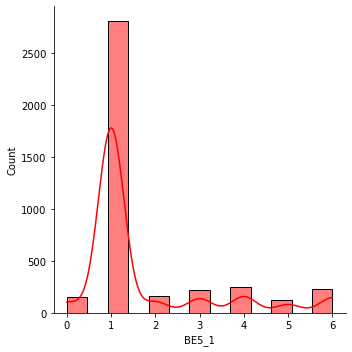

In [40]:
da=d2['BE5_1']
sns.displot(da,color='red',kde=True)

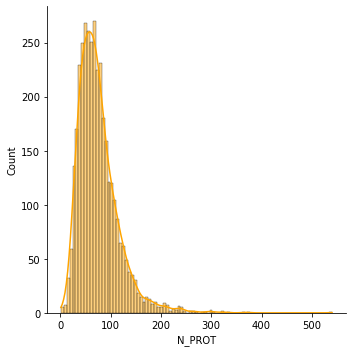

In [41]:
db=d2['N_PROT']
sns.displot(db,color='orange',kde=True)

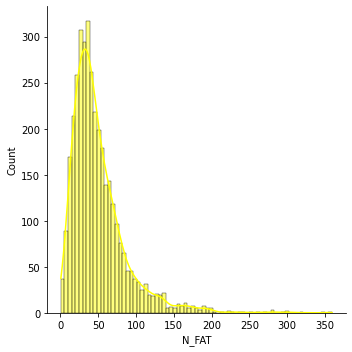

In [42]:
dc=d2['N_FAT']
sns.displot(dc,color='yellow',kde=True)

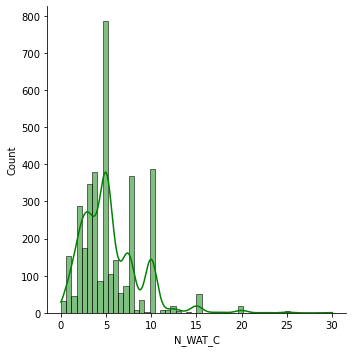

In [43]:
dd=d2['N_WAT_C']
sns.displot(dd,color='green',kde=True)

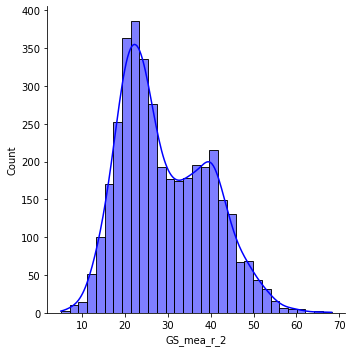

In [44]:
de=d2['GS_mea_r_2']
sns.displot(de,color='blue',kde=True)

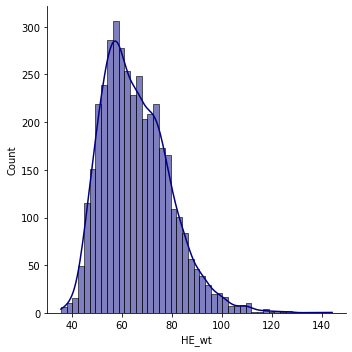

In [45]:
df=d2['HE_wt']
sns.displot(df,color='navy',kde=True)

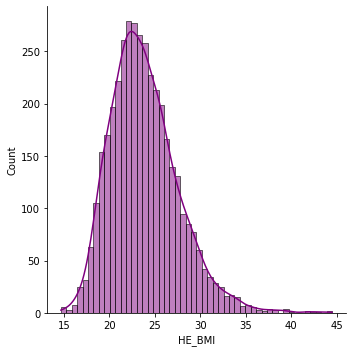

In [46]:
dg=d2['HE_BMI']
sns.displot(dg,color='purple',kde=True)

In [15]:
np.mean(d2)

age           41.739845
BE5_1          1.719241
N_PROT        75.172034
N_FAT         50.086802
N_WAT_C        5.397943
GS_mea_r_2    29.387186
HE_wt         65.700076
HE_BMI        23.832551
dtype: float64

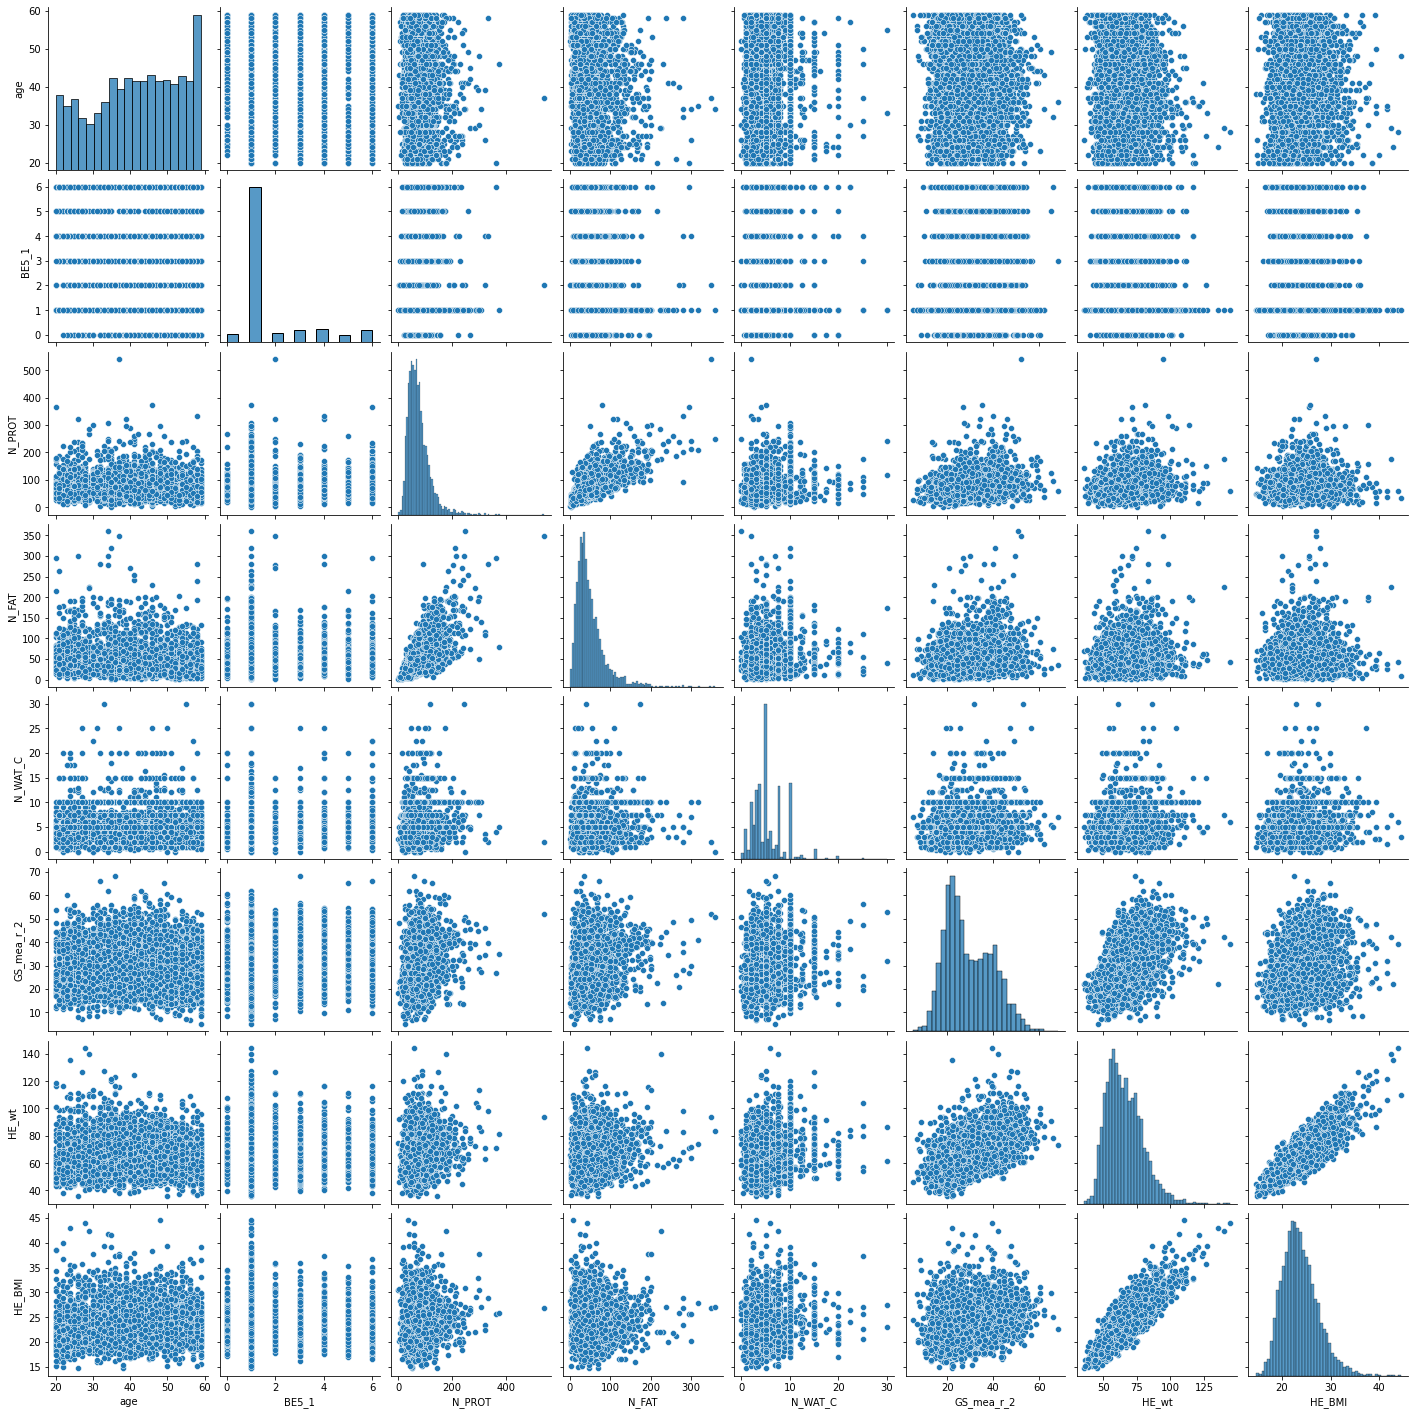

In [16]:
sns.pairplot(d2)

<AxesSubplot:xlabel='BE5_1', ylabel='N_PROT'>

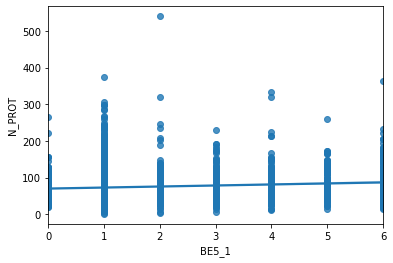

In [17]:
sns.regplot(x = 'BE5_1', y  = 'N_PROT', data = d2)

<AxesSubplot:xlabel='BE5_1', ylabel='N_FAT'>

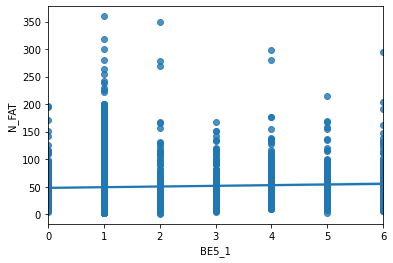

In [18]:
sns.regplot(data = d2, x = 'BE5_1', y = 'N_FAT')

<AxesSubplot:xlabel='BE5_1', ylabel='N_WAT_C'>

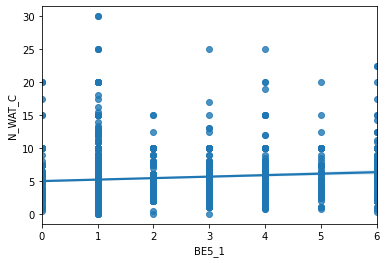

In [19]:
sns.regplot(data = d2, x = 'BE5_1', y = 'N_WAT_C')

<AxesSubplot:xlabel='BE5_1', ylabel='GS_mea_r_2'>

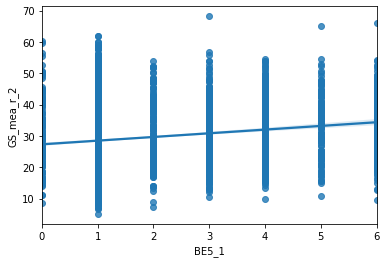

In [20]:
sns.regplot(data = d2, x = 'BE5_1', y = 'GS_mea_r_2')

<AxesSubplot:xlabel='BE5_1', ylabel='HE_wt'>

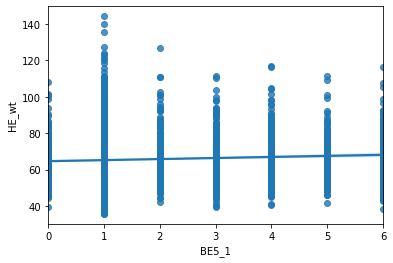

In [21]:
sns.regplot(data = d2, x = 'BE5_1', y = 'HE_wt')

<AxesSubplot:xlabel='BE5_1', ylabel='HE_BMI'>

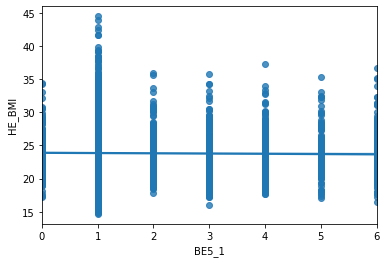

In [22]:
sns.regplot(data = d2, x = 'BE5_1', y = 'HE_BMI')

<AxesSubplot:xlabel='GS_mea_r_2', ylabel='N_PROT'>

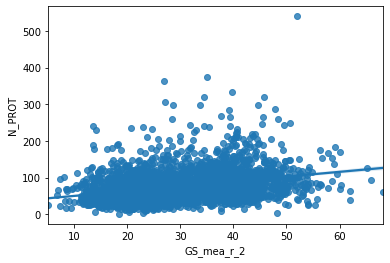

In [23]:
sns.regplot(x = 'GS_mea_r_2', y  = 'N_PROT', data = d2)

<AxesSubplot:xlabel='GS_mea_r_2', ylabel='N_FAT'>

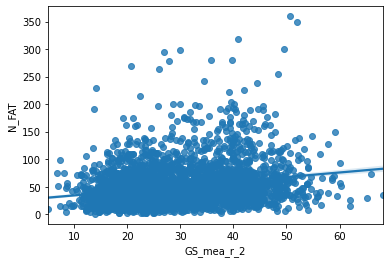

In [24]:
sns.regplot(x = 'GS_mea_r_2', y  = 'N_FAT', data = d2)

<AxesSubplot:xlabel='GS_mea_r_2', ylabel='N_WAT_C'>

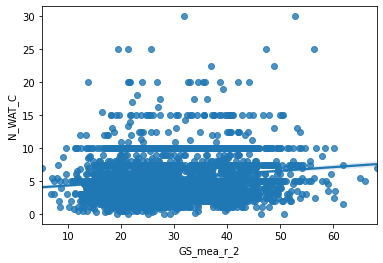

In [25]:
sns.regplot(x = 'GS_mea_r_2', y  = 'N_WAT_C', data = d2)

<AxesSubplot:xlabel='GS_mea_r_2', ylabel='HE_wt'>

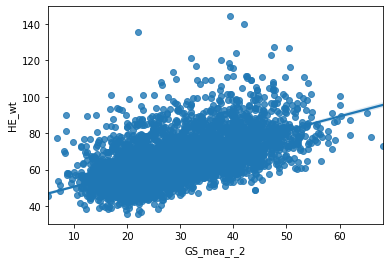

In [26]:
sns.regplot(x = 'GS_mea_r_2', y  = 'HE_wt', data = d2)

<AxesSubplot:xlabel='GS_mea_r_2', ylabel='HE_BMI'>

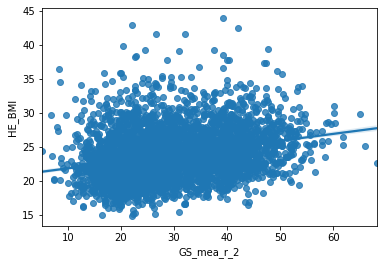

In [27]:
sns.regplot(x = 'GS_mea_r_2', y  = 'HE_BMI', data = d2)

In [28]:
d2.corr()

,age,BE5_1,N_PROT,N_FAT,N_WAT_C,GS_mea_r_2,HE_wt,HE_BMI
age,1.000000,-0.067938,-0.092700,-0.182604,-0.022423,-0.051271,-0.075164,0.083837
BE5_1,-0.067938,1.000000,0.104911,0.051492,0.105544,0.174918,0.065365,-0.014637
N_PROT,-0.092700,0.104911,1.000000,0.704116,0.115508,0.325319,0.248993,0.096141
N_FAT,-0.182604,0.051492,0.704116,1.000000,0.065797,0.229691,0.194067,0.065833
N_WAT_C,-0.022423,0.105544,0.115508,0.065797,1.000000,0.172622,0.200443,0.142396
GS_mea_r_2,-0.051271,0.174918,0.325319,0.229691,0.172622,1.000000,0.584614,0.278613
HE_wt,-0.075164,0.065365,0.248993,0.194067,0.200443,0.584614,1.000000,0.848982
HE_BMI,0.083837,-0.014637,0.096141,0.065833,0.142396,0.278613,0.848982,1.000000
